# View at nbviewer

[https://nbviewer.org/github/edwstanzah/HR-Analytics/blob/main/EDA.ipynb]

Table of Contents

- [Imports](#import)
- [Missing Values](#null)
    - [Education](#edu)
    - [Previous Year Rating](#prev_year)
    - [Imputation](#impute)
- [Duplicates](#dupe)
- [Outliers](#outliers)
- [Feature Engineering](#featureengineering)
- [Save DataFrame](#save)



# Imports <a name="import"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Read Data

In [2]:
df = pd.read_csv('data/train.csv')
df.shape

(54808, 14)

In [3]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


# Missing Values <a name="null"></a>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

Two columns, <code>education</code> and <code>previous_year_rating</code>, have null values. Previous year rating missing some values could be due to new employees having only work for a year or less. 

## Education <a name="edu"></a>

In [6]:
df.education.unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [7]:
df.education.value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

The category for education should cover everyone, looks like a case of missing entry.

In [8]:
df_no_education = df.loc[df.education.isna()]

In [9]:
df_no_education.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
employee_id,2409.0,39449.092154,22331.393537,101.0,20096.0,39550.0,58334.0,78269.0
no_of_trainings,2409.0,1.183479,0.504507,1.0,1.0,1.0,1.0,6.0
age,2409.0,30.968867,7.550183,20.0,26.0,29.0,34.0,60.0
previous_year_rating,2024.0,3.130435,1.293270,1.0,2.0,3.0,4.0,5.0
length_of_service,2409.0,4.407223,3.723495,1.0,2.0,3.0,6.0,32.0
KPIs_met >80%,2409.0,0.246990,0.431351,0.0,0.0,0.0,0.0,1.0
awards_won?,2409.0,0.023246,0.150716,0.0,0.0,0.0,0.0,1.0
avg_training_score,2409.0,58.156496,13.892265,40.0,49.0,52.0,62.0,98.0
is_promoted,2409.0,0.050643,0.219314,0.0,0.0,0.0,0.0,1.0


In [10]:
df_no_education.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0
21,33332,Operations,region_15,NaN,m,sourcing,1,41,4.0,11,0,0,57,0
32,35465,Sales & Marketing,region_7,NaN,f,sourcing,1,24,1.0,2,0,0,48,0
43,17423,Sales & Marketing,region_2,NaN,m,other,3,24,2.0,2,0,0,48,0
82,66013,Sales & Marketing,region_2,NaN,m,sourcing,2,25,3.0,2,0,0,53,0


The missing values appear random for entry with missing education. Could there be a relationship between other features and education? We could either remove rows with missing values completely or impute it with mode, which is Bachelor's. However, for this project I want to to impute missing values with an algorithm. Imputing the <code>education</code> column is a classification problem. Hence, I'll use K-nearest Neighbour (KNN) Imputation but before that, we'll look at how other features relate with education.


### Education & Age

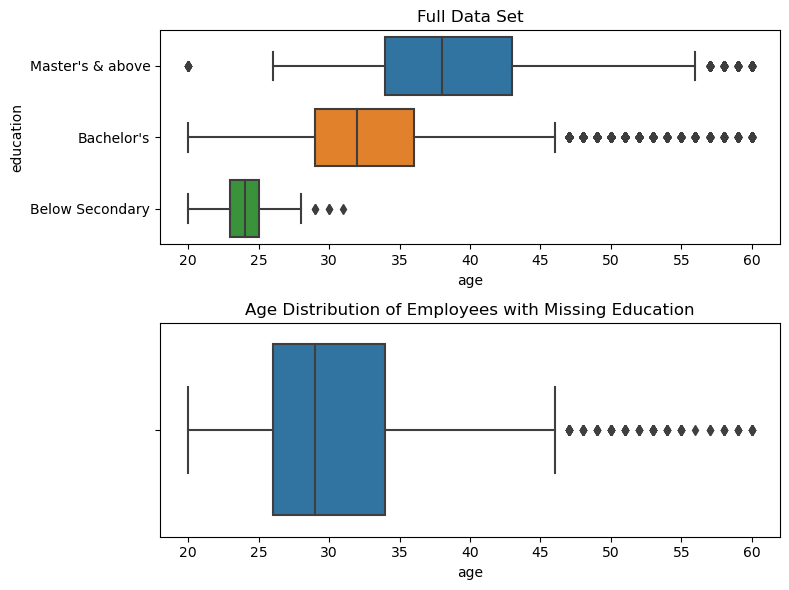

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,6), dpi=100)

sns.boxplot(data=df, y='education', x='age', orient='horizontal', ax=ax[0])
ax[0].title.set_text('Full Data Set')

sns.boxplot(data=df_no_education, x='age', orient='horizontal',ax=ax[1])
ax[1].title.set_text('Age Distribution of Employees with Missing Education')

fig.tight_layout()

I think we can see there's probably a positive correlation between age and education, where the older an employee is the more likely it is that they have a higher level of education. 

### Education & Length of Service

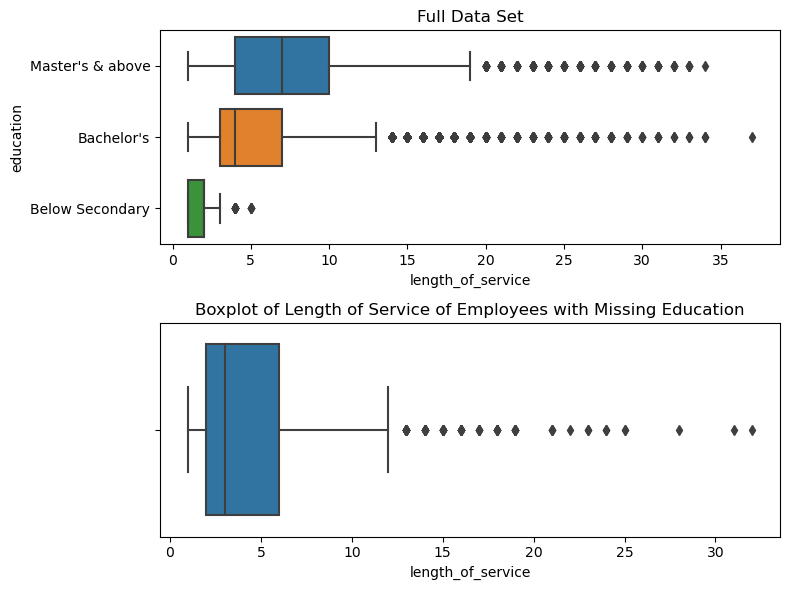

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,6), dpi=100)

sns.boxplot(data=df, y='education', x='length_of_service', orient='horizontal', ax=ax[0])
ax[0].title.set_text('Full Data Set')

sns.boxplot(data=df_no_education, x='length_of_service', orient='horizontal',ax=ax[1])
ax[1].title.set_text('Boxplot of Length of Service of Employees with Missing Education')

fig.tight_layout()

### Education & KPIs Met

In [13]:
df_kpi_edu = df.groupby('education')['KPIs_met >80%'].mean()
df_kpi_edu

education
Bachelor's          0.354496
Below Secondary     0.400000
Master's & above    0.360134
Name: KPIs_met >80%, dtype: float64

Surprisingly, people with lower education level, on average, meet their KPIs more than their more educated colleagues.

### Education & Recruitment Channel

<AxesSubplot:xlabel='education', ylabel='count'>

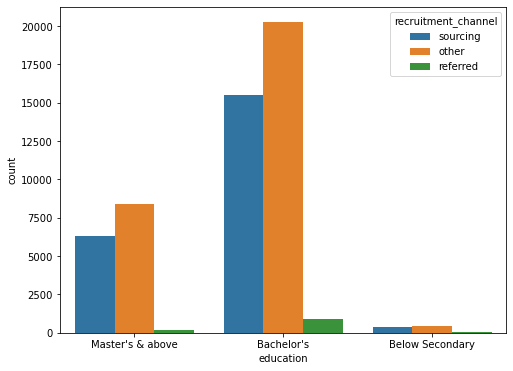

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='education', hue='recruitment_channel')

### Education & Gender

<AxesSubplot:xlabel='education', ylabel='count'>

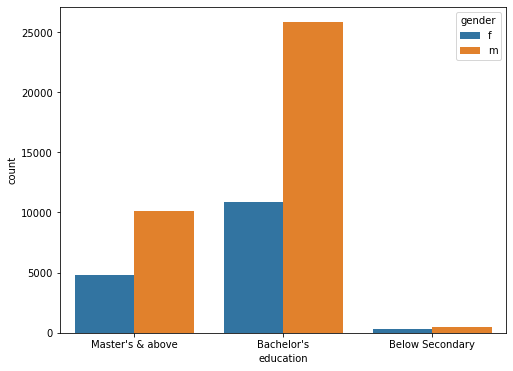

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='education', hue='gender')

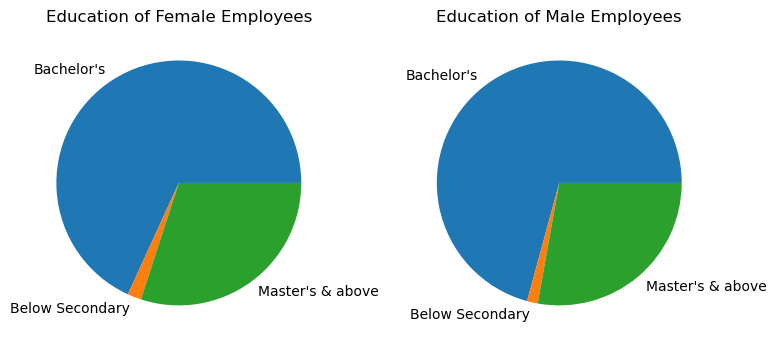

In [16]:
# groupby dataframe with the relevant columns
df_gender_edu = pd.DataFrame(df.groupby(['gender', 'education'])['education'].count())
df_gender_edu.columns = ['count']

# separate between genders
df_female = df_gender_edu.loc['f']
df_male = df_gender_edu.loc['m']

# plot pie chart for each gender
fig, ax = plt.subplots(1, 2, figsize=(8,6), dpi=100)

fig.set_facecolor(color='white')

ax[0].pie(x=df_female['count'], labels=df_female.index)
ax[0].set_title('Education of Female Employees')

ax[1].pie(x=df_male['count'], labels=df_male.index)
ax[1].set_title('Education of Male Employees');

fig.tight_layout()

Education level appears to be almost the same regardless of gender. Thus far, we see that both 'age' and 'length_of_service' have somewhat positive correlations with 'education'. We;ll use this two columns to impute education.

<AxesSubplot:xlabel='age', ylabel='length_of_service'>

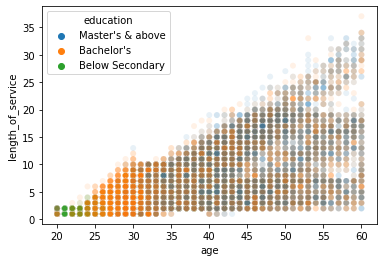

In [17]:
sns.scatterplot(data=df, x='age', y='length_of_service', hue='education', alpha=0.1)

## Previous Year Rating<a name="prev_year"></a>

In [18]:
df.previous_year_rating.unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [19]:
# create a dataframe only for employees that don't have previous_year_rating
df_no_prev = df.loc[df.previous_year_rating.isna()]

In [20]:
df_no_prev.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
employee_id,4124.0,39355.611300,22229.347366,32.0,20527.75,39749.5,57999.75,78289.0
no_of_trainings,4124.0,1.310136,0.708621,1.0,1.00,1.0,1.00,9.0
age,4124.0,26.873424,2.718587,20.0,25.00,27.0,29.00,43.0
previous_year_rating,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
length_of_service,4124.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
KPIs_met >80%,4124.0,0.349661,0.476921,0.0,0.00,0.0,1.00,1.0
awards_won?,4124.0,0.023278,0.150805,0.0,0.00,0.0,0.00,1.0
avg_training_score,4124.0,63.357420,13.801152,40.0,51.00,60.0,77.00,99.0
is_promoted,4124.0,0.082202,0.274705,0.0,0.00,0.0,0.00,1.0


All of the missing data for <code>previous_year_rating</code> are due to the fact that the employees have not worked here long enough, we can conclude this from the <code>length_of_service</code> column. We should replace the NaN values with None or 0 so we could use these rows. 

In [21]:
# replace nan values in previous_year_rating with 0
df['previous_year_rating'] = df['previous_year_rating'].replace(np.nan, 0)

In [22]:
# dropping rows with missing values on education
df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

## Imputation with KNN <a name="impute"></a>

In [23]:
from sklearn.neighbors import KNeighborsClassifier

no_nans = df.dropna(axis=0)
knn = KNeighborsClassifier(weights='distance')

# fit it to the dataframe with no missing education
knn.fit(no_nans[['age', 'length_of_service']], no_nans['education'])

# find the missing rows in education
missing_edu = df['education'].isnull()

# extract the rows with missing education
df_missing_edu = df[['age', 'length_of_service']][missing_edu]

# used the train knn to predict missing education
imputed_edu = knn.predict(df_missing_edu)


In [24]:
df.loc[missing_edu, 'education'] = imputed_edu

In [25]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

# Duplicates <a name="dupe"></a>

In [26]:
df.duplicated().any()

False

In [27]:
df.shape

(54808, 14)

No duplicates found. 

Now, the dataframe <code>df</code> is free from NaN values and there's no duplicated rows found.

# Outliers

In [28]:
#check for outliers
df.describe(include=['float64', 'int64'])

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.078748,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.496458,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,0.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,2.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


We see some quite large outliers in no_of_trainings, length_of_service, and avg_training_score. We'll investigate these further.

### Number of Trainings

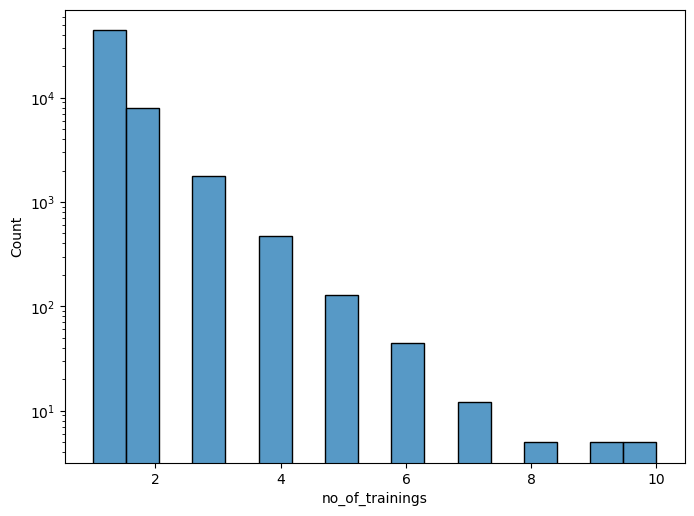

In [29]:
plt.figure(figsize=(8,6), dpi=100)

sns.histplot(data=df, x='no_of_trainings')
plt.yscale('log');

In [30]:
# check no_of_trainings that are rare (> 8)
df[df['no_of_trainings'] >= 8]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
3188,66626,Sales & Marketing,region_22,Bachelor's,m,other,8,26,0.0,1,0,0,47,0
6207,64540,Procurement,region_2,Master's & above,m,other,10,55,3.0,12,0,0,70,0
9862,14348,Procurement,region_31,Bachelor's,m,sourcing,8,26,3.0,2,1,0,68,0
13312,59241,Sales & Marketing,region_22,Bachelor's,m,sourcing,9,27,0.0,1,0,0,52,0
19960,28731,Procurement,region_7,Bachelor's,m,sourcing,9,29,0.0,1,0,0,68,0
20778,27425,Procurement,region_12,Bachelor's,m,sourcing,8,32,3.0,4,0,0,71,0
21917,65737,Procurement,region_28,Master's & above,m,sourcing,8,34,1.0,3,0,0,70,0
29372,67720,Procurement,region_27,Bachelor's,m,sourcing,9,26,2.0,2,0,0,71,0
30936,43970,Procurement,region_13,Bachelor's,m,sourcing,10,28,3.0,2,0,0,71,0
32870,640,Procurement,region_2,Bachelor's,m,sourcing,10,36,1.0,10,0,0,66,0


### Length of Service

<AxesSubplot:xlabel='length_of_service', ylabel='Count'>

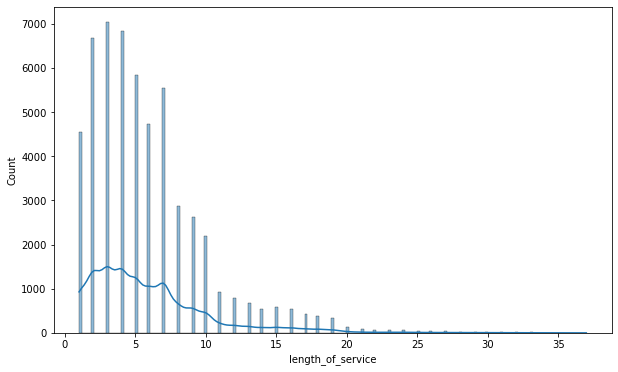

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='length_of_service', kde=True)

<AxesSubplot:xlabel='length_of_service'>

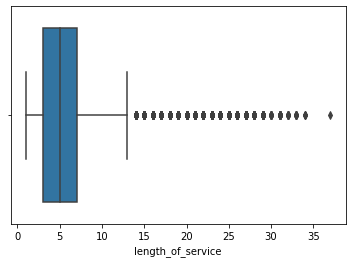

In [32]:
sns.boxplot(data=df, x='length_of_service')

In [33]:
# see the top 10 longest serving employees
df[df.length_of_service >= 15].sort_values('length_of_service', ascending=False)[:10]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
31071,51576,Sales & Marketing,region_2,Bachelor's,m,sourcing,2,60,5.0,37,0,0,48,0
16757,50120,Operations,region_2,Bachelor's,f,sourcing,1,60,5.0,34,1,0,62,0
11227,71985,Analytics,region_2,Bachelor's,m,other,2,60,5.0,34,1,0,87,1
2004,36078,Technology,region_13,Master's & above,f,sourcing,1,60,3.0,34,0,0,84,0
16159,71819,Sales & Marketing,region_2,Bachelor's,f,other,1,60,3.0,34,0,0,46,0
15352,33961,Sales & Marketing,region_7,Master's & above,m,other,1,58,3.0,33,0,0,54,0
25944,75634,Technology,region_2,Master's & above,f,other,1,60,5.0,33,1,0,80,0
7929,28744,Operations,region_22,Master's & above,f,other,1,60,5.0,33,1,0,65,0
12455,34517,Operations,region_2,Master's & above,m,sourcing,1,56,1.0,33,0,0,54,0
39602,39584,Technology,region_2,Bachelor's,f,sourcing,1,60,3.0,33,0,0,81,0


The values appear to be outliers in the boxplot but looking at the data. All of the longest serving employees are also the oldest. Most of them being 60 years old.

### Average Training Score

<AxesSubplot:xlabel='avg_training_score', ylabel='Count'>

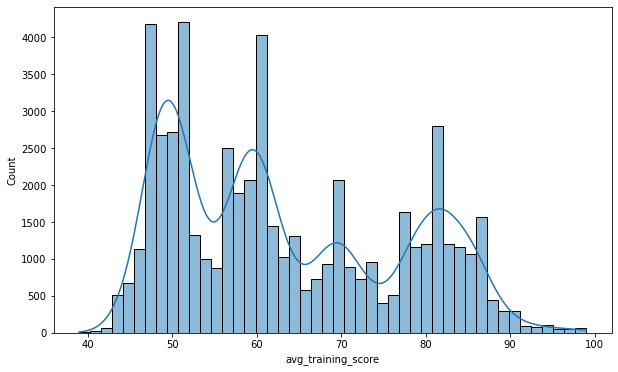

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='avg_training_score', kde=True)

<AxesSubplot:xlabel='avg_training_score'>

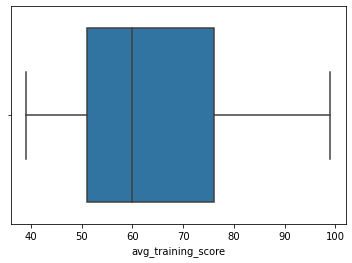

In [35]:
sns.boxplot(data=df, x='avg_training_score')

In [36]:
df[df.avg_training_score > 90].head(20)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
78,7520,Analytics,region_2,Bachelor's,m,other,1,25,3.0,2,1,0,91,0
122,38052,Procurement,region_34,Master's & above,m,sourcing,1,37,5.0,3,0,1,92,1
200,53630,Sales & Marketing,region_23,Master's & above,f,sourcing,1,34,4.0,5,1,1,94,1
230,62923,Operations,region_13,Master's & above,f,other,1,38,5.0,2,1,1,93,1
296,22031,Procurement,region_2,Bachelor's,f,other,1,29,4.0,2,1,0,95,1
344,70197,R&D,region_22,Master's & above,m,other,1,30,4.0,2,1,0,96,1
406,10452,Analytics,region_2,Bachelor's,m,other,2,26,3.0,2,0,0,91,0
529,4857,Analytics,region_28,Bachelor's,m,other,1,36,5.0,3,1,0,91,1
530,58988,Procurement,region_23,Master's & above,m,other,2,35,5.0,6,1,0,91,1
536,6731,R&D,region_29,Bachelor's,m,sourcing,1,30,5.0,1,0,0,96,1


At this point, we can be quite satisfied with the data because there isn't any trend-breaking outliers. Even if they are outliers in the boxplots, further inspections show they carry valuable information. So, I decide to keep them to retain information for the model. 

In [37]:
# save clean dataframe
df.to_csv('data/clean_training_data.csv', index=False)

# Feature Engineering

## Department

In [38]:
df.department.unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [39]:
# plotly express pie chart
px.pie(values= df.department.value_counts(), names=df.department.unique(), title='Proportion of Employees by Department', hole=.6)

<b>On average, does any particular department have better promotion opportunity?</b>

In [40]:
# promoted employees by department divided by total employees in that department
df_dptment = df.groupby(['department', 'is_promoted'], as_index=False).agg(no_of_ppl=('is_promoted', pd.Series.count))

In [41]:
df_dptment

,department,is_promoted,no_of_ppl
0,Analytics,0,4840
1,Analytics,1,512
2,Finance,0,2330
3,Finance,1,206
4,HR,0,2282
5,HR,1,136
6,Legal,0,986
7,Legal,1,53
8,Operations,0,10325
9,Operations,1,1023


In [42]:
# pivot
df_dptment = df_dptment.pivot(index='department', columns='is_promoted', values='no_of_ppl')

In [43]:
df_dptment['total_ppl'] = df_dptment[0] + df_dptment[1]
df_dptment['promotion_rate'] = round(df_dptment[1] / df_dptment['total_ppl'] * 100, 2)

df_dptment = df_dptment.sort_values('promotion_rate')
df_dptment

is_promoted,0,1,total_ppl,promotion_rate
department,,,,
Legal,986,53,1039,5.10
HR,2282,136,2418,5.62
R&D,930,69,999,6.91
Sales & Marketing,15627,1213,16840,7.20
Finance,2330,206,2536,8.12
Operations,10325,1023,11348,9.01
Analytics,4840,512,5352,9.57
Procurement,6450,688,7138,9.64
Technology,6370,768,7138,10.76


In [44]:
# make the process of obtaining the pivot_table df into a function
def promotion_rate_by_category(col_name: str):
    """Return a DataFrame that has the number of people promoted and the rate of promotion by each category class"""
    # groupby relevant columns
    new_df = df.groupby([col_name, 'is_promoted'], as_index=False).agg(no_of_ppl=('is_promoted', pd.Series.count))

    # pivot to extract relevant information
    new_df = new_df.pivot(index=col_name, columns='is_promoted', values='no_of_ppl')

    # create new columns of total ppl and promotion rate
    new_df['total_ppl'] = new_df[0] + new_df[1]
    new_df['promotion_rate'] = round(new_df[1]/new_df['total_ppl']*100, 2)

    # sort values
    new_df = new_df.sort_values('promotion_rate')

    # plot the bar chart
    plt.figure(figsize=(8,6), dpi=100)
    with sns.axes_style('whitegrid'):
        sns.barplot(x=new_df.index, y=new_df.promotion_rate, palette='coolwarm')
        plt.xticks(rotation=90)
        plt.ylabel('% of Employees Promoted')

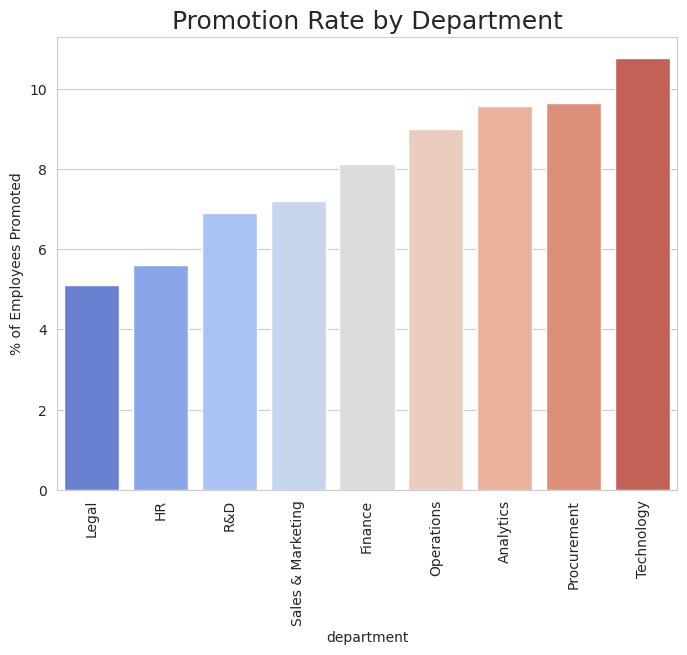

In [45]:
# visualize the rate of promotion by department

plt.figure(figsize=(8,6), dpi=100)
with sns.axes_style('whitegrid'):
    sns.barplot(x=df_dptment.index, y=df_dptment.promotion_rate, palette='coolwarm')
    plt.title('Promotion Rate by Department', fontsize=18)
    plt.xticks(rotation=90)
    plt.ylabel('% of Employees Promoted')

The technology department appears to be promoting employees more often, with a rate of about 11%. Whereas, the Legal deparment have tougher luck in this company with only about 5% of them being promoted. 

## Region

Next, we'll be looking at the relationship between the region in which an employee works and their chance at promotion

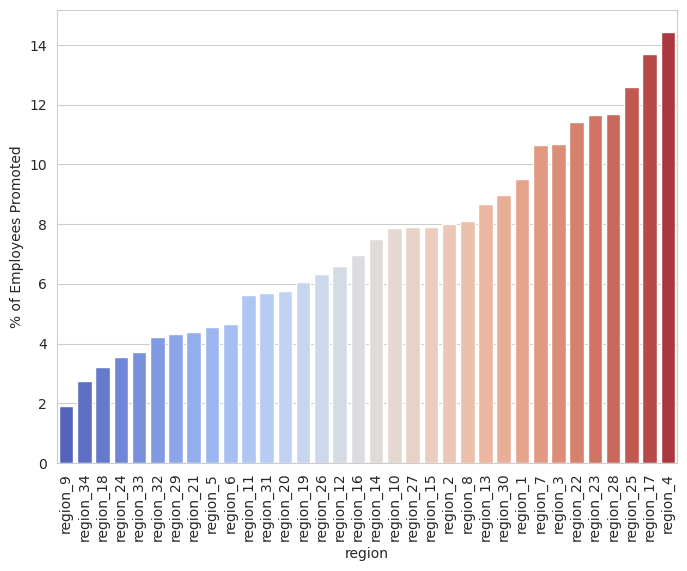

In [46]:
# use promotion_rate_by_category to create a new df
promotion_rate_by_category('region')

It appears that the region plays a role in whether or not an employee is going to be promoted. Region_9 has a 2% rate of employees being promoted while Region_4 has a vastly better chance at over 14%. Perhaps region_4 is a big city while region_9 is more rural and subsequently has less opportunities.

In [47]:
# chi-square testing to see if department has any relationship with promotion
# df_chi = df.groupby(['region', 'is_promoted'], as_index=False).agg(no_of_ppl=('is_promoted', pd.Series.count)).pivot(index='region', columns='is_promoted', values='no_of_ppl')

## Education

Similar to department and region, we'll now be looking at if education provide useful information in predicting who will be promoted.

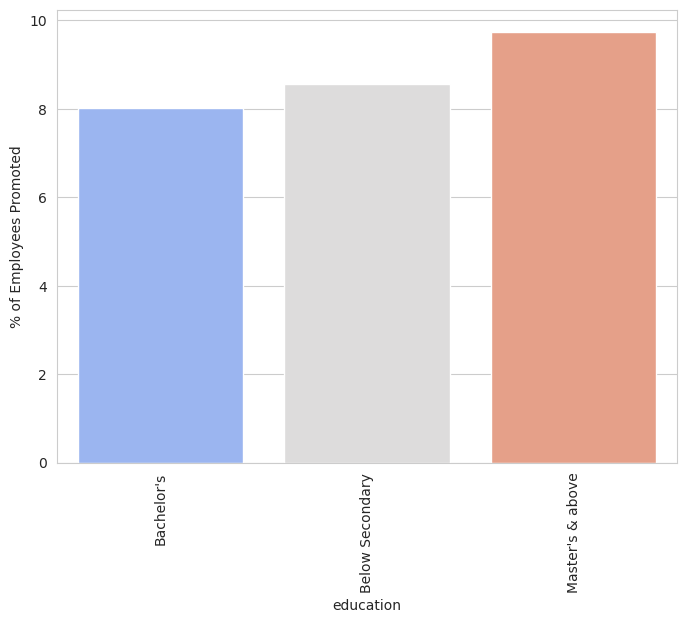

In [48]:
promotion_rate_by_category('education')

In [49]:
df.education.value_counts()

Bachelor's          38633
Master's & above    15252
Below Secondary       923
Name: education, dtype: int64

Although the bar chart shows employees with below secondary education level having higher promotion rate than people with Bachelor's degree. It doesn't tell the whole story. Bachelor's degree make up the vast majority of the employees' education level in this dataset while there are less than 1,000 employees with education level lower than that. 

However, we can see some positive relationship when considering whether someone will be promoted if their education level is Master's or above. 

## Gender

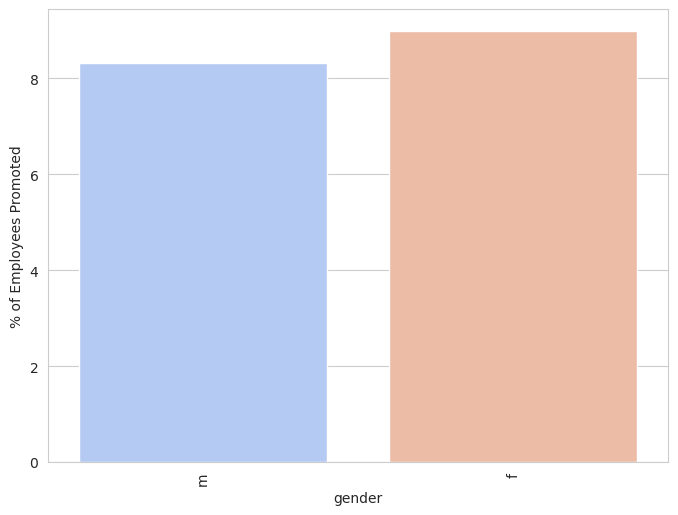

In [50]:
promotion_rate_by_category('gender')

There isn't much difference in the rate at which employees obtained promotion based on their gender.

## Recruitment Channel

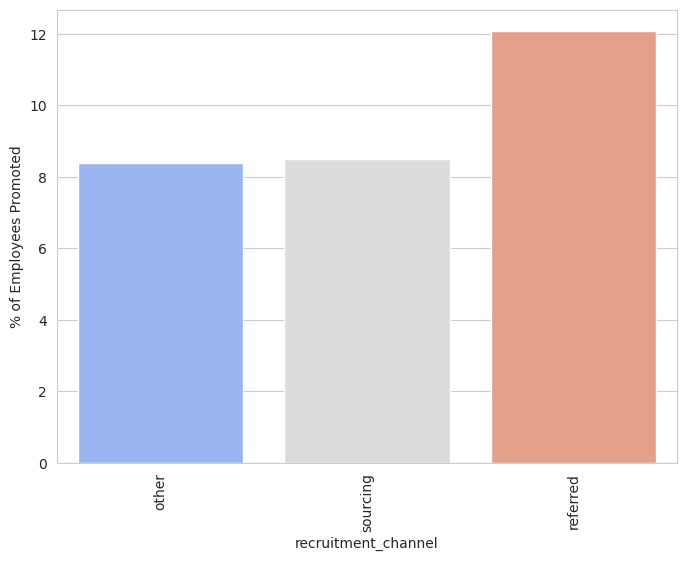

In [51]:
promotion_rate_by_category('recruitment_channel')

Interestingly, people who were referred to the company during their recruitment have quite a significantly higher chance to be promoted. Almost a 4% difference compared to other channels of recruitment. 

## No of Trainings

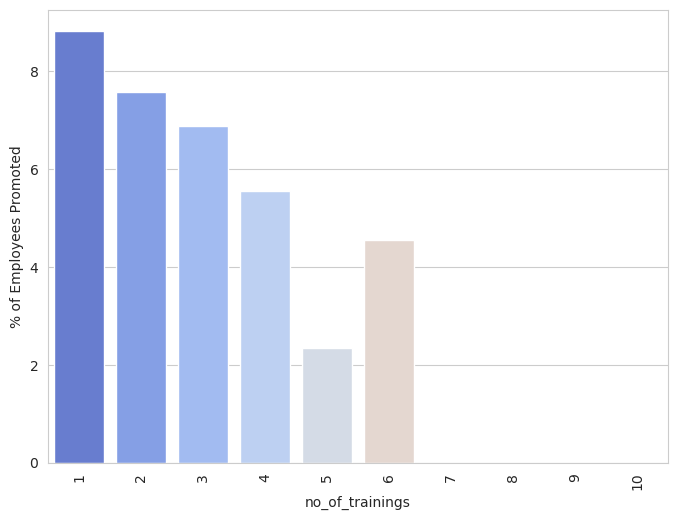

In [52]:
promotion_rate_by_category('no_of_trainings')

The chart shows a negative relationship in which more trainings equal to less chance of being promoted, except for 6 trainings for some reasons. Could it be that the company assigned employees with lower performance more trainings than their better performing colleagues?

In [53]:
perf_train = df.groupby(['no_of_trainings', 'KPIs_met >80%'], as_index=False).agg(total=('KPIs_met >80%', pd.Series.count))

In [54]:
perf_train = perf_train.pivot(index='no_of_trainings', columns='KPIs_met >80%', values='total')

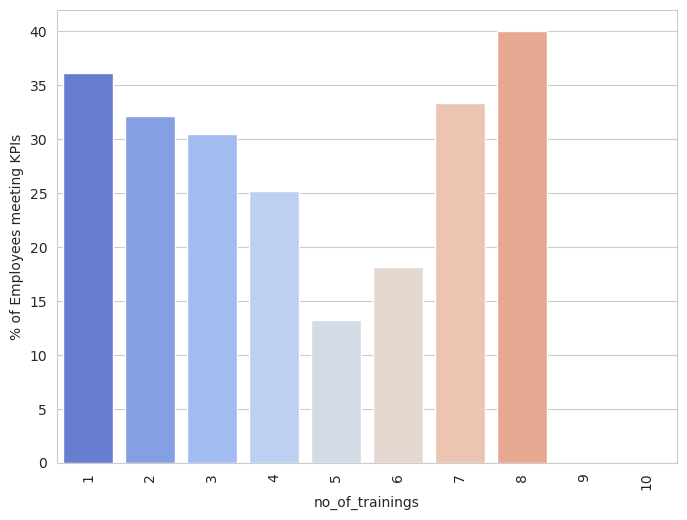

In [55]:
perf_train['total_ppl'] = perf_train[0] + perf_train[1]
perf_train['KPIs_met_rate'] = round(perf_train[1]/perf_train['total_ppl']*100, 2)

# sort values
perf_train = perf_train.sort_values('KPIs_met_rate')

# plot the bar chart
plt.figure(figsize=(8,6), dpi=100)
with sns.axes_style('whitegrid'):
    sns.barplot(x=perf_train.index, y=perf_train.KPIs_met_rate, palette='coolwarm')
    plt.xticks(rotation=90)
    plt.ylabel('% of Employees meeting KPIs')

It appears our suspicion is correct. The rate at which employees meet their KPIs are similar to the rate at which they get promoted. However, seems that employes with more than 5 trainings somehow have better chance at meeting their KPIs. Although, it could be a problem of sample size at that number of trainings.

In [56]:
df.no_of_trainings.value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
8         5
10        5
9         5
Name: no_of_trainings, dtype: int64

## Age

We have previously used <code>age</code> to help us estimate the missing values for <code>education</code>. Now, we'll be looking at if age plays a factor in someone's promotion chance.

In [57]:
df.age.describe()

count    54808.000000
mean        34.803915
std          7.660169
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         60.000000
Name: age, dtype: float64

To use our function, <code>promotion_rate_by_category()</code>, we'll need to create a new column that change our <code>age</code> column into an ordinal category since there's ordinality in age. 

In [58]:
def age_category(age):
    """Return a category for an age"""
    if age >= 50:
        return '50+ yrs'
    elif age >= 40:
        return '40-49 yrs'
    elif age >=30:
        return '30-39 yrs'
    else:
        return '20-29 yrs'

df['age_bracket'] = df['age'].apply(age_category)
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,age_bracket
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,30-39 yrs
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,30-39 yrs
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,30-39 yrs
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,30-39 yrs
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,40-49 yrs


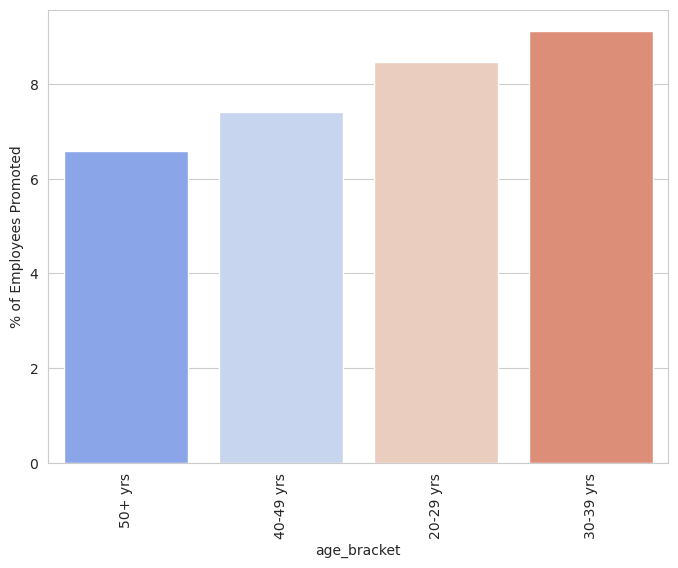

In [59]:
promotion_rate_by_category('age_bracket')

Clearly, we can see that the company favours their younger employees to climb the ranks with people in their 20s and 30s getting the nod more often than their older coworkers. 

## Previous Year Rating

Here, we'll see if an employee's performance last year affect their chances at obtaining a promotion

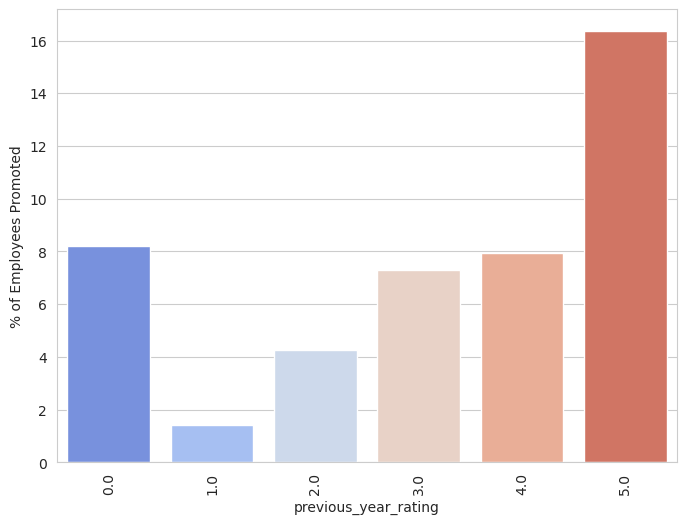

In [60]:
promotion_rate_by_category('previous_year_rating')

The graph makes sense intuitively. Although, a perfect rating (5) drastically improves an employee's chance at being promoted. At second, the score zero simply means that the employees are new and haven't worked for a full year yet. 

The difference in perception of rating 4 and 5 must've been far if the difference in promotion rate is this high.

## Length of Service

We'll see here whether loyalty earns you a better chance at promotion at this company.

In [61]:
def length_of_service_cat(years):
    """Return a category for length of service"""
    if years > 15:
        return '15+ yrs'
    elif years > 10:
        return '11-15 yrs'
    elif years >= 5:
        return '5-10 yrs'
    else:
        return 'Under 5 years'

df['length_of_service_cat'] = df['length_of_service'].apply(length_of_service_cat)
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,age_bracket,length_of_service_cat
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,30-39 yrs,5-10 yrs
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,30-39 yrs,Under 5 years
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,30-39 yrs,5-10 yrs
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,30-39 yrs,5-10 yrs
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,40-49 yrs,Under 5 years


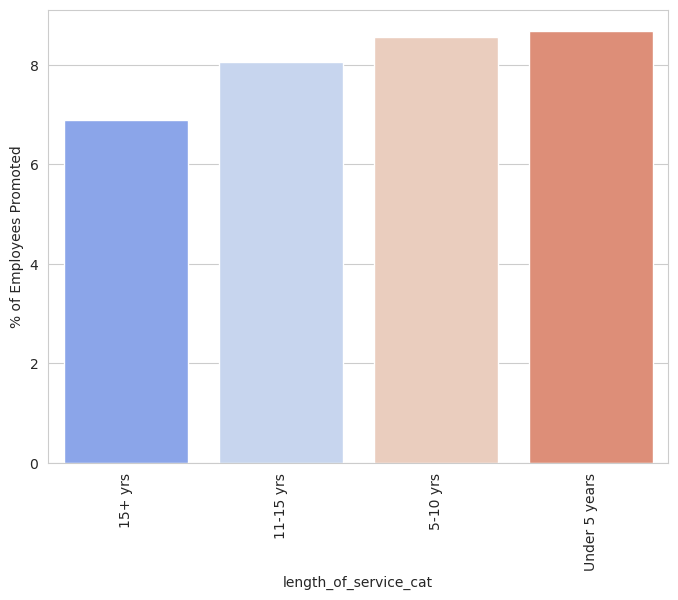

In [62]:
promotion_rate_by_category('length_of_service_cat')

The company seems to prioritise newer employees. Although, the rates do not vary much between 0-10 years of service. 

There could be a number of reasons. Perhaps the longer serving employees tend to be in higher position already which makes it harder to obtain promotion. We cannot say for certain if that's the case since we don't have the relevant data to make this assessment. However, there's enough difference in the promotion rates above to include <code>length_of_service</code> as one of our features.

## KPIs Met

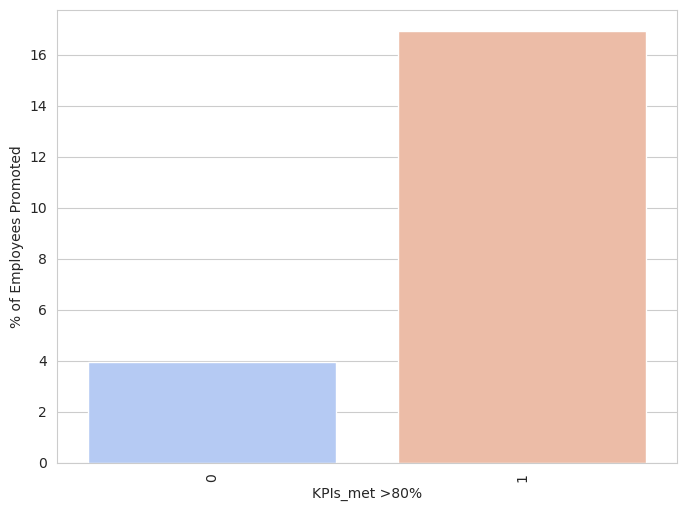

In [63]:
promotion_rate_by_category('KPIs_met >80%')

As expected, meeting KPIs more than 80% of the time give you a much better chance at promotion.

## Awards

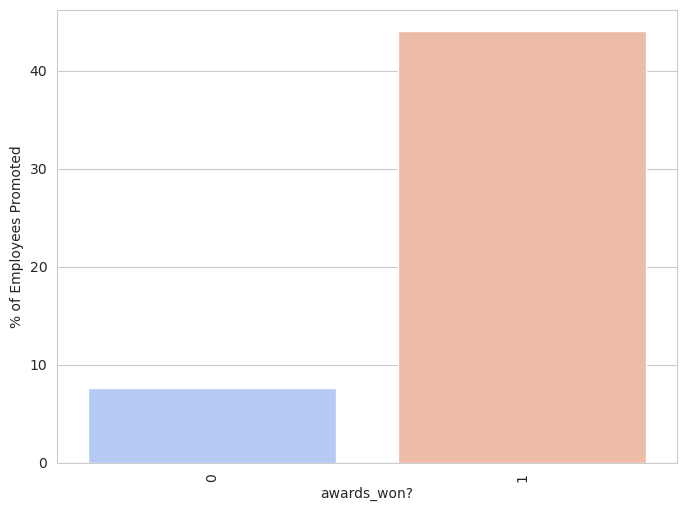

In [64]:
promotion_rate_by_category('awards_won?')

## Traininig Score

In [65]:
df.avg_training_score.describe()

count    54808.000000
mean        63.386750
std         13.371559
min         39.000000
25%         51.000000
50%         60.000000
75%         76.000000
max         99.000000
Name: avg_training_score, dtype: float64

In [66]:
def score_bracket(score):
    """Return a score bracket for a score"""
    if score > 85:
        return 4
    elif score > 70:
        return 3
    elif score > 55:
        return 2
    else:
        return 1

df['training_score_bracket'] = df['avg_training_score'].apply(score_bracket)
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,age_bracket,length_of_service_cat,training_score_bracket
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,30-39 yrs,5-10 yrs,1
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,30-39 yrs,Under 5 years,2
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,30-39 yrs,5-10 yrs,1
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,30-39 yrs,5-10 yrs,1
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,40-49 yrs,Under 5 years,3


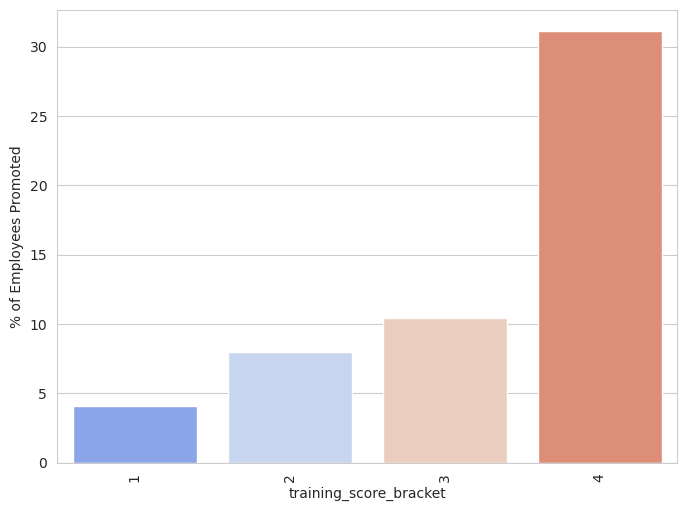

In [67]:
promotion_rate_by_category('training_score_bracket')

The rates line up as expected. High average training score leads to higher chance of being promoted. The improvement appears marginal up to category 3 (70-85 avg score) and then tripled for employees scoring more than 85% on their trainings (category 4). 

# Save DataFrame <a name="save"></a>

In [68]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'age_bracket',
       'length_of_service_cat', 'training_score_bracket'],
      dtype='object')

In [70]:
columns_to_include = [
    'employee_id', 'department', 'region', 'education', 'gender',
    'recruitment_channel', 'no_of_trainings', 'previous_year_rating', 'length_of_service',
    'KPIs_met >80%', 'awards_won?',
    'age', 'avg_training_score',
    'is_promoted'
    ]

df_features = df[columns_to_include]

In [74]:
df_cat = df_features.select_dtypes(include='object')
df_num = df_features.select_dtypes(exclude='object')

In [77]:
df_cat = pd.get_dummies(df_cat)

In [80]:
df_dummies = pd.concat([df_num, df_cat], axis=1)
df_dummies.head()

,employee_id,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,age,avg_training_score,is_promoted,department_Analytics,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,1,5.0,8,1,0,35,49,0,0,...,0,0,0,0,1,1,0,0,0,1
1,65141,1,5.0,4,0,0,30,60,0,0,...,0,0,1,0,0,0,1,1,0,0
2,7513,1,3.0,7,0,0,34,50,0,0,...,0,0,1,0,0,0,1,0,0,1
3,2542,2,1.0,10,0,0,39,50,0,0,...,0,0,1,0,0,0,1,1,0,0
4,48945,1,3.0,2,0,0,45,73,0,0,...,0,0,1,0,0,0,1,1,0,0


In [81]:
df_dummies.to_csv('data/feature_engineering.csv', index=False)